In [412]:
import numpy as np
import math,struct,pickle
from pathlib import Path
import matplotlib.pyplot as plt

In [413]:
def tanh(x):
    return np.tanh(x)
def softmax(x):
    exp=np.exp(x-x.max())
    return exp/exp.sum()

In [414]:
dimensions=[28*28,10]
activation=[tanh,softmax]
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]},
]

In [415]:
def init_parameters_b(layer):
    dist=distribution[layer]['b']
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters_w(layer):
    dist=distribution[layer]['w']
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]
def init_parameters():
    parameter=[]
    for i in range(len(distribution)):
        layer_parameter={}
        for j in distribution[i].keys():
            if j=='b':
                layer_parameter['b']=init_parameters_b(i)
                continue
            if j=='w':
                layer_parameter['w']=init_parameters_w(i)
                continue
        parameter.append(layer_parameter)
    return parameter

In [416]:
parameters=init_parameters()

In [417]:
def predict(img,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [418]:
predict(np.random.rand(784),parameters).argmax()

7

In [419]:
test_img=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0703125, 0.0703125, 0.0703125, 0.4921875, 0.53125, 0.68359375, 0.1015625, 0.6484375, 0.99609375, 0.96484375, 0.49609375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875, 0.140625, 0.3671875, 0.6015625, 0.6640625, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.87890625, 0.671875, 0.98828125, 0.9453125, 0.76171875, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19140625, 0.9296875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98046875, 0.36328125, 0.3203125, 0.3203125, 0.21875, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.7109375, 0.96484375, 0.94140625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3125, 0.609375, 0.41796875, 0.98828125, 0.98828125, 0.80078125, 0.04296875, 0.0, 0.16796875, 0.6015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0546875, 0.00390625, 0.6015625, 0.98828125, 0.3515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.54296875, 0.98828125, 0.7421875, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04296875, 0.7421875, 0.98828125, 0.2734375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13671875, 0.94140625, 0.87890625, 0.625, 0.421875, 0.00390625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.31640625, 0.9375, 0.98828125, 0.98828125, 0.46484375, 0.09765625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17578125, 0.7265625, 0.98828125, 0.98828125, 0.5859375, 0.10546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.36328125, 0.984375, 0.98828125, 0.73046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.97265625, 0.98828125, 0.97265625, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1796875, 0.5078125, 0.71484375, 0.98828125, 0.98828125, 0.80859375, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15234375, 0.578125, 0.89453125, 0.98828125, 0.98828125, 0.98828125, 0.9765625, 0.7109375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09375, 0.4453125, 0.86328125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.78515625, 0.3046875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08984375, 0.2578125, 0.83203125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.7734375, 0.31640625, 0.0078125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0703125, 0.66796875, 0.85546875, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.76171875, 0.3125, 0.03515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21484375, 0.671875, 0.8828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.953125, 0.51953125, 0.04296875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.53125, 0.98828125, 0.98828125, 0.98828125, 0.828125, 0.52734375, 0.515625, 0.0625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

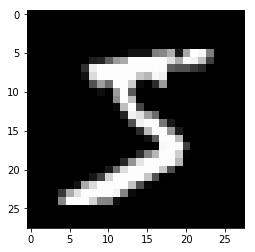

In [420]:
import matplotlib.pyplot as plt
im = np.reshape(test_img,(28,28))
plt.imshow(im , cmap='gray')

In [421]:
path='model_02.pkl'
with open(path,'rb') as f:
    parameters=pickle.load(f)

In [422]:
predict(np.array(test_img),parameters).argmax()

5

In [423]:
parameters

[{'b': array([-1.22268644e-02, -1.69337185e-02, -1.55384097e-02, -3.15686490e-02,
          1.10621898e-02,  5.53598326e-03, -6.35943805e-03, -5.84399455e-03,
          8.42867360e-03,  5.93783115e-03, -1.56796413e-02, -5.56046295e-03,
         -1.58257714e-02, -2.08147441e-02,  4.14084064e-03, -3.30956987e-03,
         -1.44388093e-02, -1.70634684e-02,  1.99394249e-04, -8.62252737e-03,
          2.74250602e-02, -1.00596961e-02, -3.61814817e-03,  2.21515384e-03,
          1.08541903e-02,  1.01123336e-02, -6.22160272e-03,  2.33535257e-02,
         -1.44424552e-02,  6.65463041e-03, -1.68420346e-02,  7.61633816e-04,
          4.15787745e-03,  5.26976593e-02,  1.05732735e-02, -7.68558429e-03,
         -3.49612494e-02,  5.01457301e-02, -2.15991903e-02,  2.41617243e-02,
          9.82514398e-03, -1.22803316e-03,  2.24658303e-02, -1.66578564e-02,
          1.14147401e-02, -2.75883366e-02,  1.08087783e-02,  2.57514564e-02,
         -2.37001587e-03,  4.03441970e-02, -1.53690019e-02,  3.20923099

In [424]:
dataset_path=Path('./MNIST')
train_img_path=dataset_path/'train-images.idx3-ubyte'
train_lab_path=dataset_path/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images.idx3-ubyte'
test_lab_path=dataset_path/'t10k-labels.idx1-ubyte'

In [425]:
train_num=50000
valid_num=10000
test_num=10000

with open(train_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    tmp_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    train_img=tmp_img[:train_num]
    valid_img=tmp_img[train_num:]
    
with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)

with open(train_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tmp_lab=np.fromfile(f,dtype=np.uint8)
    train_lab=tmp_lab[:train_num]
    valid_lab=tmp_lab[train_num:]
    
with open(test_lab_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_lab=np.fromfile(f,dtype=np.uint8)

In [426]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(train_lab[index]))
def show_valid(index):
    plt.imshow(valid_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(valid_lab[index]))
def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print('label : {}'.format(test_lab[index]))

label : 0


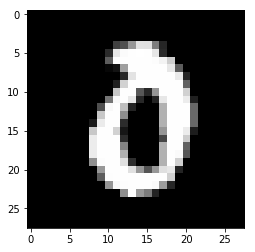

In [427]:
show_train(np.random.randint(train_num))

label : 2


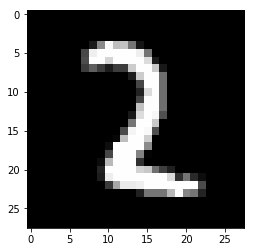

In [428]:
show_valid(np.random.randint(valid_num))

label : 3


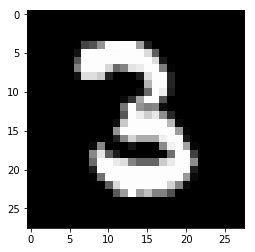

In [429]:
show_test(np.random.randint(test_num))

In [430]:
def d_softmax(data):
    sm=softmax(data)
    return np.diag(sm)-np.outer(sm,sm)

# def d_tanh(data):
#     return np.diag(1/(np.cosh(data))**2)
def d_tanh(data):
    return 1/(np.cosh(data))**2

differential={softmax:d_softmax,tanh:d_tanh}

In [431]:
d_tanh([1,2,3,4])

array([0.41997434, 0.07065082, 0.00986604, 0.00134095])

In [432]:
d_softmax(np.array([1,2,3,4]))

array([[ 0.03103085, -0.00279373, -0.00759413, -0.02064299],
       [-0.00279373,  0.07955019, -0.02064299, -0.05611347],
       [-0.00759413, -0.02064299,  0.18076935, -0.15253222],
       [-0.02064299, -0.05611347, -0.15253222,  0.22928869]])

In [433]:
h=0.0001
func=softmax
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[-4.79630346e-06  1.43301350e-06  1.57663188e-06  1.78665780e-06]
[ 1.06052546e-06 -4.36496259e-06  1.99621482e-06  1.30822204e-06]
[ 2.12148813e-06  1.51277105e-06 -4.81103267e-06  1.17677321e-06]
[ 1.44132658e-06  1.40046493e-06  1.85056520e-06 -4.69235643e-06]


In [434]:
h=0.000001
func=tanh
input_len=4
for i in range(input_len):
    test_input=np.random.rand(input_len)
    derivative=differential[func](test_input)
    value1=func(test_input)
    test_input[i]+=h
    value2=func(test_input)
#     print((value2-value1)/h)
#     print(derivative[i])
    print(derivative[i]-(value2-value1)/h)

[3.75077114e-07 7.49388145e-01 7.49388145e-01 7.49388145e-01]
[9.77588385e-01 1.46340571e-07 9.77588385e-01 9.77588385e-01]
[8.28067413e-01 8.28067413e-01 3.43371143e-07 8.28067413e-01]
[6.36302442e-01 6.36302442e-01 6.36302442e-01 3.83780900e-07]


In [435]:
onehot=np.identity(dimensions[-1])

def sqr_loss(img,lab,parameters):
    y_pred=predict(img,parameters)
    y=onehot[lab]
    diff=y-y_pred
    return np.dot(diff,diff)

In [436]:
sqr_loss(train_img[0],train_lab[0],parameters)

0.10263648423433012

In [437]:
def grad_parameters(img,lab,parameters):
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    
    diff=onehot[lab]-l1_out
    act1=np.dot(differential[activation[1]](l1_in),diff)
    
    grad_b1=-2*act1
    grad_w1=-2*np.outer(l0_out,act1)
    grad_b0=-2*differential[activation[0]](l0_in)*np.dot(parameters[1]['w'],act1)
    
    return {'w1':grad_w1,'b1':grad_b1,'b0':grad_b0}

In [438]:
grad_parameters(train_img[2],train_lab[2],init_parameters())

{'w1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'b1': array([ 0.00044855,  0.00189367,  0.01035186,  0.02675018, -0.14141527,
         0.03932357,  0.01907385,  0.01828508,  0.01929373,  0.00599477]),
 'b0': array([-9.48883874e-003,  1.09069147e-002,  2.83405707e-003,
        -3.35560405e-003,  8.78667761e-003,  9.19894228e-003,
        -1.45633625e-002, -2.72318025e-003,  5.32164883e-003,
        -7.60512166e-003, -5.17578352e-003,  1.10301580e-003,
         4.94312606e-003,  9.89732459e-003,  1.22115434e-002,
        -1.29487581e-002,  9.14521412e-004, -9.27545691e-003,
         9.55402424e-003,  8.94594987e-004, -3.99957932e-003,
        -5.61201545e-003,  6.64645073e-003, -1.17153903e-002,
         1.71753295e-003, -8.08742052e-003, -4.17022106e-003,
         1.25681106e-003, -

In [439]:
# b1 
h=0.00001
for i in range(10):
    img_i=np.random.randint(train_num)
    test_parameters=init_parameters()
    derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b1']
    value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[1]['b'][i]+=h
    value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    print(derivative[i]-(value2-value1)/h)

-1.1023339905290308e-07
5.885452944442982e-07
-6.160968886032014e-07
-7.653179533509413e-08
-1.4405931919592163e-07
-2.774377864597777e-09
-6.439364665933311e-07
1.865585188241814e-08
-1.056000562306425e-07
9.946794527794511e-09


In [440]:
# w1
grad_list=[]
h=0.0001
for i in range(784):
    for j in range(10):
        img_i=np.random.randint(train_num)
        test_parameters=init_parameters()
        derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['w1']
        value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        test_parameters[1]['w'][i][j]+=h
        value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
        grad_list.append(derivative[i][j]-(value2-value1)/h)
np.abs(grad_list).max()

9.304084420236336e-06

In [441]:
# b0 
grad_list=[]
h=0.001
for i in range(784):
    img_i=np.random.randint(train_num)
    test_parameters=init_parameters()
    derivative=grad_parameters(train_img[img_i],train_lab[img_i],test_parameters)['b0']
    value1=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    test_parameters[0]['b'][i]+=h
    value2=sqr_loss(train_img[img_i],train_lab[img_i],test_parameters)
    grad_list.append(derivative[i]-(value2-value1)/h)
np.abs(grad_list).max()

1.0776641798373662e-06

In [442]:
def valid_loss(parameters):
    loss_accu=0
    for img_i in range(valid_num):
        loss_accu+=sqr_loss(valid_img[img_i],valid_lab[img_i],parameters)
    return loss_accu
def valid_accuracy(parameters):
    correct=[predict(valid_img[img_i],parameters).argmax()==valid_lab[img_i] for img_i in range(valid_num)]
    print('validation accuracy : {}'.format(correct.count(True)/len(correct)))

In [443]:
valid_loss(parameters)

1503.6989970176978

In [444]:
valid_accuracy(init_parameters())

validation accuracy : 0.0717


In [402]:
batch_size=100
def train_batch(current_batch,parameters):
    grad_accu=grad_parameters(train_img[current_batch*batch_size+0],train_lab[current_batch*batch_size+0],parameters)
    for img_i in range(1,batch_size):
        grad_tmp=grad_parameters(train_img[current_batch*batch_size+img_i],train_lab[current_batch*batch_size+img_i],parameters)
        for key in grad_accu.keys():
            grad_accu[key]+=grad_tmp[key]
    for key in grad_accu.keys():
        grad_accu[key]/=batch_size
    return grad_accu

In [388]:
train_batch(0,parameters)

{'w1': array([[ 1.13231842e-05,  4.32359646e-07,  7.03147055e-06, ...,
          5.03579828e-06,  2.99710544e-06,  2.11672234e-08],
        [ 1.71797125e-05,  6.55982831e-07,  1.06682573e-05, ...,
          7.64039208e-06,  4.54725535e-06,  3.21152431e-08],
        [ 1.09527246e-07,  4.18214176e-09,  6.80142259e-08, ...,
          4.87104254e-08,  2.89904942e-08,  2.04746973e-10],
        ...,
        [-6.25173716e-06, -2.38713671e-07, -3.88220355e-06, ...,
         -2.78035637e-06, -1.65475675e-06, -1.16868113e-08],
        [ 1.12922027e-05,  4.31176662e-07,  7.01223168e-06, ...,
          5.02201978e-06,  2.98890503e-06,  2.11093075e-08],
        [ 3.30941818e-06,  1.26365415e-07,  2.05508240e-06, ...,
          1.47180882e-06,  8.75961662e-07,  6.18652782e-09]]),
 'b1': array([ 1.39391816e-04,  5.32247779e-06,  8.65595257e-05,  1.50794810e-01,
         8.45764069e-08, -1.51134347e-01,  9.03034212e-06,  6.19921974e-05,
         3.68952729e-05,  2.60574911e-07]),
 'b0': array([-2.7716

In [389]:
import copy
def combine_parameters(parameters,grad,learn_rate):
    parameter_tmp=copy.deepcopy(parameters)
    parameter_tmp[0]['b']-=learn_rate*grad['b0']
    parameter_tmp[1]['b']-=learn_rate*grad['b1']
    parameter_tmp[1]['w']-=learn_rate*grad['w1']
    return parameter_tmp

In [390]:
combine_parameters(parameters,train_batch(0,parameters),1)

[{'b': array([ 1.09128714e-01,  1.40417375e-01,  1.66129956e-03,  5.69346990e-02,
          7.91132404e-02, -5.03629910e-02,  9.57344562e-02,  6.01829412e-02,
         -1.08861133e-02,  5.96663437e-02, -5.69728140e-02,  1.51097927e-02,
         -1.32595544e-03,  8.59097848e-02, -3.46385591e-02,  3.24978281e-02,
         -1.00204893e-01,  9.25328100e-02, -1.47885435e-02, -4.77967929e-03,
          6.89230558e-02,  2.82696995e-02,  5.79279490e-02,  7.47786141e-02,
          6.45396122e-03,  5.41315840e-02, -5.80521923e-03, -2.76872076e-02,
          9.33585973e-02, -1.00686813e-02, -6.54023862e-03, -6.92197318e-02,
         -4.53509552e-03,  3.03096943e-02,  2.91551267e-02,  9.34206578e-02,
          8.75056278e-02, -3.03529991e-02,  1.14912497e-01, -1.80594499e-02,
         -9.55168089e-04,  5.57976801e-02,  8.71546040e-02,  6.16015911e-02,
          4.02638616e-02,  6.00879301e-02,  1.28967203e-01,  4.99476357e-02,
          1.28428207e-03,  1.10564975e-01,  2.16136471e-02, -4.52533646

In [406]:
parameters=init_parameters()

In [407]:
valid_accuracy(parameters)

validation accuracy : 0.1072


In [410]:
learn_rate=1
for i in range(train_num//batch_size):
    if i%100==99:
        print('running batch {}/{}'.format(i+1,train_num//batch_size))
    grad_tmp=train_batch(i,parameters)
    parameters=combine_parameters(parameters,grad_tmp,learn_rate)

running batch 100/500
running batch 200/500
running batch 300/500
running batch 400/500
running batch 500/500


In [411]:
valid_accuracy(parameters)

validation accuracy : 0.9162
